既存の計算結果を読み込んで実行する。（https://issp-center-dev.github.io/PHYSBO/manual/master/ja/notebook/tutorial_once_mode.html）

In [1]:
import physbo
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_data():
    A = np.asarray(np.loadtxt("data/s5-210.csv", skiprows=1, delimiter=","))
    X = A[:, 0:3]
    y = -A[:,3]
    return X, y

X, y = load_data()
X = physbo.misc.centering(X) # 探索範囲の中心化

In [3]:
X.shape,y.shape

((17982, 3), (17982,))

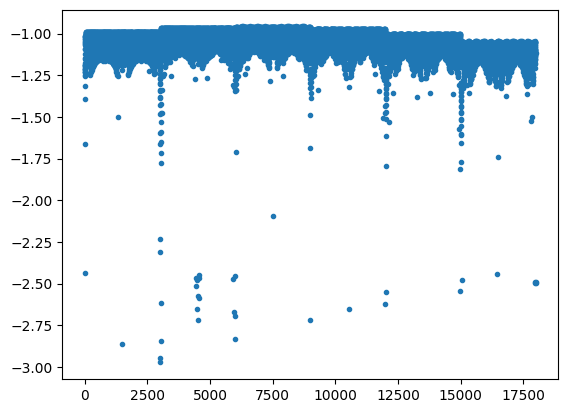

In [23]:
plt.plot(y,".")

In [24]:
# ランダムサーチを行う。

random.seed(1)
calculated_ids = random.sample(range(y.size), 20)
print(calculated_ids)
t_initial = y[calculated_ids]

[4402, 2067, 8358, 3863, 16234, 14728, 15474, 12439, 6879, 3075, 15986, 928, 12773, 14180, 69, 14594, 8727, 7496, 3349, 10401]


In [25]:
# policyのセット
policy = physbo.search.discrete.policy(test_X=X, initial_data=[calculated_ids, t_initial])

# シード値のセット
policy.set_seed(0)

In [26]:
class simulator:
    def __call__(self, action):
        return y[action]

In [27]:
res = policy.bayes_search(max_num_probes=100, simulator=simulator(), score="TS", interval=10,  num_rand_basis = 5000)

Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood -15.09882342987541
50 -th epoch marginal likelihood -15.655785363245835
100 -th epoch marginal likelihood -15.860986235395174
150 -th epoch marginal likelihood -15.941378149358242
200 -th epoch marginal likelihood -15.989532010344796
250 -th epoch marginal likelihood -16.030005626727046
300 -th epoch marginal likelihood -16.06654770970932
350 -th epoch marginal likelihood -16.09894402796396
400 -th epoch marginal likelihood -16.12682933189836
450 -th epoch marginal likelihood -16.150167820002252
500 -th epoch marginal likelihood -16.169203019560335
Done

0021-th step: f(x) = -1.139857 (action=8817)
   current best f(x) = -0.965442 (best action=6879) 

0022-th step: f(x) = -1.174500 (action=3246)
   current best f(x) = -0.965442 (best action=6879) 

0023-th step: f(x) = -1.120414 (action=2950)
   current best f(x) = -0.965442 (best action=6879) 

0024-th step: f(x

In [28]:
import matplotlib.pyplot as plt

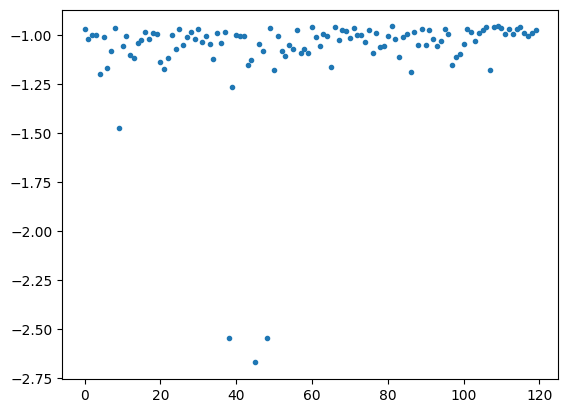

In [29]:
# 探索点
plt.plot(res.fx[0:res.total_num_search],".")

-0.95748724


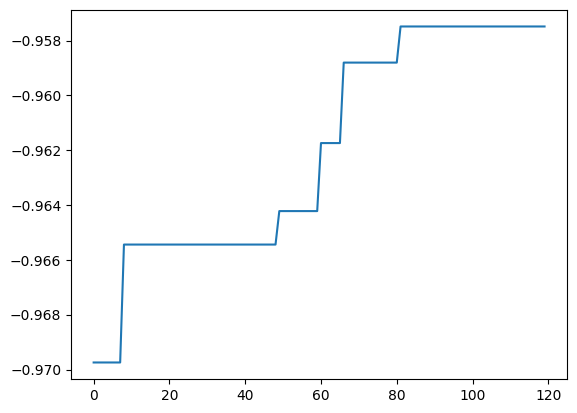

In [30]:
# 探索中の最大値
best_fx, best_action = res.export_all_sequence_best_fx()
plt.plot(best_fx)
print(best_fx[-1])